pip installing the libraries

In [1]:
!pip install yfinance
!pip install --upgrade pandas-datareader
!pip install pycryptodome pycryptodomex
!pip uninstall --yes pandas-datareader
!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316
!pip install talib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 819.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.3 MB/s eta 0:00:00
Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Successfully uninstalled pandas-datareader-0.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/raphi6/pandas-datareader.git (t

In [2]:
!pip install talib -i https://pypi.org/simple


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [3]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib


--2023-03-21 09:45:02--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-21 09:45:02--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-03-21 09:45:03--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

import libraries

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
#import talib
import matplotlib.pyplot as plt
import datetime
import pandas_datareader
pandas_datareader.__version__
from pandas_datareader import data as pdr
from numpy.core.fromnumeric import sort
import datetime
import math

RSI

RSI stands for Relative Strength Index, which is a technical analysis indicator used in the financial markets to measure the strength of a security's price action. It is a momentum oscillator that measures the speed and change of price movements, and is commonly used to identify overbought or oversold conditions in a particular security. RSI is calculated using a mathematical formula that compares the average gains and losses of a security over a specified time period, typically 14 days. Traders and investors use RSI to help identify potential trading opportunities and make informed decisions about buying or selling securities.

In [5]:
# Data Science for Finance moving averages:
# Read the dataframe form the url finance.yahoo.com
def Moving_Averages(data):

  sma_100 = data['Adj Close'].rolling(window=30).mean()
  sma_200 = data['Adj Close'].rolling(window=60).mean()

  data.loc[:,'sma_100'] = sma_100
  data.loc[:,'sma_200'] = sma_200


  # Shift the SMAs one period to the left to avoid comparing the same value
  data['sma_100_prev'] = data['sma_100'].shift(1)
  data['sma_200_prev'] = data['sma_200'].shift(1)

  # Create a boolean column to indicate when sma_100 crosses above sma_200
  data['buy_signal'] = np.where((data['sma_100'] > data['sma_200']) &(data['sma_100_prev'] <= data['sma_200_prev']), True, False)

  # Create a boolean column to indicate when sma_100 crosses below sma_200
  data['sell_signal'] = np.where((data['sma_100'] < data['sma_200']) & (data['sma_100_prev'] >= data['sma_200_prev']), True, False)

  # Combine the two crossover columns into one
  data['crossover'] = np.where(data['buy_signal'], 'above',np.where(data['sell_signal'], 'below', np.nan))


  # Shift the buy signal forward one period to ensure it occurs after the cross
  data['buy_signal'] = data['buy_signal'].shift(-1)

  # Shift the sell signal forward one period to ensure it occurs after the cross
  data['sell_signal'] = data['sell_signal'].shift(-1)

  # Calculate the returns
  time = []
  buy=[]
  sell=[]
  buy_index=data.index[0]
  sell_index=data.index[-1]
  for i, row in data.iterrows():
      if row['buy_signal']:
          buy_index=i        
          time.append(1)
          buy.append(data.loc[buy_index, 'Adj Close'])
      if row['sell_signal']:
          sell_index=i        
          time.append(-1)
          sell.append(data.loc[sell_index, 'Adj Close'])
      else:
        time.append(0)
        buy.append(np.nan)
        sell.append(np.nan)
        #buy.append(100 * (data.loc[sell_index, 'Adj Close'] - data.loc[buy_index, 'Adj Close']) / data.loc[buy_index, 'Adj Close'])
  buy=sell=data['Adj Close']
  return buy,sell,time



  

In [6]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal

    
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

ADX stands for Average Directional Index, which is a technical analysis indicator used to measure the strength of a trend in the financial markets. The ADX is a non-directional indicator, meaning that it does not indicate the direction of the trend, but only its strength. It is calculated based on the difference between the +DI (positive directional indicator) and -DI (negative directional indicator), which are also part of the ADX indicator. The ADX ranges from 0 to 100, with higher values indicating a stronger trend. Traders and investors use the ADX to identify whether a security is trending or in a range-bound market, and to determine the strength of the trend, which can help them make informed decisions about entering or exiting trades.





MACD stands for Moving Average Convergence Divergence, which is a popular technical analysis indicator used to identify trend changes and generate trading signals in the financial markets. The MACD indicator is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA, and then plotting a nine-period EMA on top of the MACD line. The result is a visual representation of the relationship between two moving averages, which can help traders and investors identify momentum, trend direction, and potential trend reversals. When the MACD line crosses above the signal line, it is considered a bullish signal, and when the MACD line crosses below the signal line, it is considered a bearish signal. The MACD is a versatile indicator that can be used in combination with other technical analysis tools to help identify trading opportunities and manage risk.





In [7]:
def MACD(etf):
  macd_line, signal_line, histogram = talib.MACD(etf['Adj Close'])
  # create a new dataframe to store the signals and prices
  signals_df = pd.DataFrame({'date': etf.index, 'close': etf['Adj Close'], 'macd_line': macd_line, 'signal_line': signal_line, 'histogram': histogram})

  # generate the signals
  signals = []
  buy_prices = []
  sell_prices = []
  position = 0  # initialize position to zero
  for i in range(len(signals_df)):
      if signals_df['macd_line'][i] > signals_df['signal_line'][i] and position <= 0:
          signals.append(1)  # buy signal
          buy_prices.append(signals_df['close'][i])
          sell_prices.append(np.nan)
          position = 1  # update position to long
      elif signals_df['macd_line'][i] < signals_df['signal_line'][i] and position >= 0:
          signals.append(-1)  # sell signal
          buy_prices.append(np.nan)
          sell_prices.append(signals_df['close'][i])
          position = -1  # update position to short
      else:
          signals.append(0)  # hold signal
          buy_prices.append(np.nan)
          sell_prices.append(np.nan)
  return buy_prices,sell_prices,signals


Moving Average (MA) is a widely used technical analysis indicator that helps traders and investors smooth out price data over a specified time period. The MA is calculated by taking the average of a security's price over a certain number of periods, which can range from a few days to several months. There are several types of moving averages, including Simple Moving Average (SMA), Exponential Moving Average (EMA), and Weighted Moving Average (WMA), each with its own unique calculation method. The MA is used to identify trends and potential trend reversals in the financial markets. When the price of a security is above its MA, it is considered to be in an uptrend, and when the price is below its MA, it is considered to be in a downtrend. Traders and investors use MAs in combination with other technical analysis tools to help identify trading opportunities and manage risk.





In [8]:
def implement_bollinger_bands_strategy(data, window_size=30, num_std=2):
    # Compute rolling mean and standard deviation
    rolling_mean = data.rolling(window_size).mean()
    rolling_std = data.rolling(window_size).std()

    # Compute upper and lower Bollinger Bands
    upper_band = rolling_mean + num_std * rolling_std
    lower_band = rolling_mean - num_std * rolling_std

    # Initialize trading strategy
    strategy = pd.DataFrame(index=data.index)
    strategy['signal'] = 0.0

    # Generate trading signals
    for i in range(window_size, len(data)):
        if data[i] > upper_band[i-1]:
            strategy['signal'][i] = -1.0
        elif data[i] < lower_band[i-1]:
            strategy['signal'][i] = 1.0
    return data,data, strategy['signal']



calculating the percent of revenue and dealing with leftover stock

In [9]:
def sell_left_over_stock(last_price_dict,dict_alocation):
  result = {key: dict_alocation[key] * last_price_dict[key] for key in dict_alocation if key in last_price_dict}
  total_cash = sum(value for value in result.values())
  return total_cash


def get_total_percent(dict_alocation, last_price_dict, intial_cash):
  dict_alocation['Cash'] = dict_alocation['Cash'] + sell_left_over_stock(last_price_dict,dict_alocation)
  method_percent_revenue = round(( dict_alocation['Cash'] - intial_cash) / intial_cash,3)*100
  return method_percent_revenue

In [10]:
    def ADX(etf,threshold = 100):
        ADX =  talib.ADX(etf['High'], etf['Low'], etf['Close'], timeperiod=40)
        Signal = []
        Plus_DI = talib.PLUS_DI(etf['High'], etf['Low'], etf['Close'], timeperiod=40)
        Minus_DI = talib.MINUS_DI(etf['High'], etf['Low'], etf['Close'], timeperiod=40)
        Signal=[]
        signals = []
        buy_prices = []
        sell_prices = []
        for i in range(1, len(Plus_DI)):
            if ADX[i] > Plus_DI[i] and ADX[i-1] <= Plus_DI[i-1]:
                signals.append(1)
                buy_prices.append(etf['Close'][i])
                sell_prices.append(np.nan)
            elif ADX[i] > Minus_DI[i] and ADX[i-1] <= Minus_DI[i-1]:
                signals.append(-1)
                buy_prices.append(np.nan)
                sell_prices.append(etf['Close'][i])
            else:
                signals.append(0)
                buy_prices.append(np.nan)
                sell_prices.append(np.nan)
        return buy_prices, sell_prices,signals


Setup the data

In [11]:
M=1000000
alocation_list = {'XLK':0 ,'XLE':0,'XLF':0,'XLV':0 ,'XLRE':0,'XLB':0,'XLY':0,'XLP':0 ,'XLU':0 ,'XLI':0,'IYZ':0 ,"Cash":M}
price_list = {'XLK':0 ,'XLE':0,'XLF':0,'XLV':0 ,'XLRE':0,'XLB':0,'XLY':0,'XLP':0 ,'XLU':0 ,'XLI':0,'IYZ':0 ,"Cash":M}

In [18]:
historical_data = {}
bollinger_bands = {}
all_signals = {}
dictionary_percent_list = []
#date_ranges = [('2010-01-01', '2023-03-10'), ('2019-01-01', '2023-03-10'), ('2022-01-01', '2023-03-10')]
#date_ranges = [('2010-01-01', '2023-03-10')]
#date_ranges = [ ('2022-01-01', '2023-03-10')]
date_ranges = [ ('2019-01-01', '2023-03-10')]
etf_lst =['XLK', 'XLE', 'XLF', 'XLV', 'VNQ', 'XLB', 'XLY', 'XLP', 'XLU', 'XLI', 'IYZ']
last_etf_price = {key: None for key in etf_lst}
etf_total_percent = {}
methods = ["ADX", "Moving Averages", "Bollinger Bands", "MACD", "RSI"]

for start_date, end_date in date_ranges:
  print(start_date)
  for ticker in etf_lst:
    # download per timeframe the data per ticker
    data = yf.download(ticker, start=start_date, end=end_date)
    historical_data[ticker] = data
    etf = historical_data[ticker]
    # RSI
    etf['rsi_14'] = get_rsi(etf['Adj Close'], 14)
    buy_price_rsi, sell_price_rsi, rsi_signal_rsi = implement_rsi_strategy(etf['Adj Close'], etf['rsi_14'])
    all_signals.setdefault(methods[4],{})
    all_signals[methods[4]][ticker] = {"buy_sell": rsi_signal_rsi,
                                      "buy_price": etf['Adj Close'],
                                      "sell_price": etf['Adj Close']}

    # Bollinger Bands
    buy_price_ma, sell_price_ma, rsi_signal_ma = implement_bollinger_bands_strategy(etf['Adj Close'])
    all_signals.setdefault(methods[2],{})
    all_signals[methods[2]][ticker] = {"buy_sell": rsi_signal_ma,
                                      "buy_price": etf['Adj Close'],
                                      "sell_price": etf['Adj Close']}

    # MACD
    buy_price_macd, sell_price_macd, rsi_signal_macd = MACD(etf)
    all_signals.setdefault(methods[3],{})
    all_signals[methods[3]][ticker] = {"buy_sell": rsi_signal_macd,
                                      "buy_price": etf['Adj Close'],
                                      "sell_price": etf['Adj Close']}

    # ADX
    buy_price_ADX, sell_price_ADX, rsi_signal_ADX = ADX(etf, 25)
    all_signals.setdefault(methods[0],{})
    all_signals[methods[0]][ticker] = {"buy_sell": rsi_signal_ADX,
                                      "buy_price": etf['Adj Close'],
                                      "sell_price": etf['Adj Close']}

    # Moving Average
    buy_price_MA, sell_price_MA, rsi_signal_MA = Moving_Averages(etf)
    all_signals.setdefault(methods[1],{})
    all_signals[methods[1]][ticker] = {"buy_sell": rsi_signal_MA,
                                      "buy_price": etf['Adj Close'],
                                      "sell_price": etf['Adj Close']}
    last_etf_price[ticker] = data['Adj Close'][-1] #last price of each etf

  alocation_list = {'XLK':0 ,'XLE':0,'XLF':0,'XLV':0 ,'VNQ':0,'XLB':0,'XLY':0,'XLP':0 ,'XLU':0 ,'XLI':0,'IYZ':0 ,"Cash":M}
  for method in methods:
    #print(method)
    M=1000000
    alocation_list = {'XLK':0 ,'XLE':0,'XLF':0,'XLV':0 ,'VNQ':0,'XLB':0,'XLY':0,'XLP':0 ,'XLU':0 ,'XLI':0,'IYZ':0 ,"Cash":M}
    for day in range(0,len(data)-1):
        for ticker in etf_lst:
          dat = all_signals[method][ticker]
          if dat['buy_sell'][day]== 1:
            alocation_list[ticker]+=math.floor((M/10)/dat["buy_price"][day])
            alocation_list['Cash']-=math.floor((M/10)/dat["buy_price"][day])*dat["buy_price"][day]
            M=alocation_list['Cash']
          if dat['buy_sell'][day]== -1 and alocation_list[ticker]!=0:
            alocation_list['Cash']+=alocation_list[ticker]*dat["sell_price"][day]
            alocation_list[ticker]=0
            M=alocation_list['Cash']
        
 
    etf_total_percent[method] = get_total_percent(alocation_list,last_etf_price, 1000000)
  print('percent return:',start_date, 'is',etf_total_percent )
  dictionary_percent_list.append(etf_total_percent)


2019-01-01
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
percent return: 2019-01-01 is {'ADX': 24.9, 'Moving Averages': 3.5999999999999996, 'Bollinger Bands': 28.1, 'MACD': 37.8, 'RSI': 22.2}


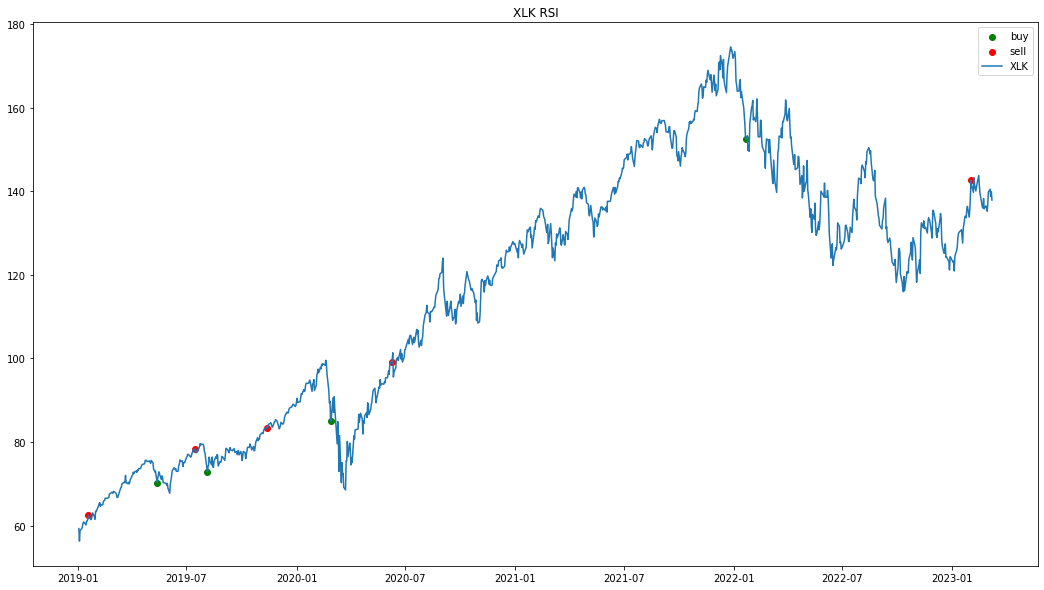

In [19]:
#Plot the result for one method and one etf
df=pd.DataFrame()
etf="XLK"
method="RSI"
l=min(len(all_signals["Moving Averages"][etf]["buy_price"].keys()),len(all_signals[method][etf]["buy_price"]),len(all_signals[method][etf]["buy_sell"]))
df=pd.DataFrame()
df = pd.DataFrame(index=all_signals[method][etf]["buy_price"].keys()[0:l])#Datetime 
#df = pd.DataFrame(index=historical_data[etf]["Adj Close"].keys())#Datetime
df["buy_price"]=list(all_signals[method][etf]["buy_price"][0:l]) 
df["signal"]= list(all_signals[method][etf]["buy_sell"][0:l])
#Plot the result 
plt.figure(figsize=(18,10))
plt.title(etf +" "+method)
plt.scatter(df.index[df['signal']==1], df['buy_price'][df['signal']==1], c='green', label='buy')
plt.scatter(df.index[df['signal']==-1], df['buy_price'][df['signal']==-1], c='red', label='sell')
plt.plot(all_signals[method][etf]["buy_price"], label=etf)
plt.legend()
plt.show()

In [17]:
#Funtion that plot the result 
def plots(method,etf):
  l=min(len(all_signals[method][etf]["buy_price"].keys()),len(all_signals[method][etf]["buy_price"]),len(all_signals[method][etf]["buy_sell"]))
  df=pd.DataFrame()
  df = pd.DataFrame(index=all_signals[method][etf]["buy_price"].keys()[0:l])#The relevat datetime in the dataset all_signals keys  
  df["buy_price"]=list(all_signals[method][etf]["buy_price"][0:l]) 
  df["signal"]= list(all_signals[method][etf]["buy_sell"][0:l])
#Plot the result 
  plt.figure(figsize=(12,8))
  plt.title(etf +" "+method)
  plt.scatter(df.index[df['signal']==1], df['buy_price'][df['signal']==1], c='green', label='buy')
  plt.scatter(df.index[df['signal']==-1], df['buy_price'][df['signal']==-1], c='red', label='sell')
  plt.plot(all_signals[method][etf]["buy_price"], label=etf)
  plt.legend()
  plt.show()

#Plot the result in loop : 
#etf_lst =['XLK', 'XLE', 'XLF', 'XLV', 'XLRE', 'XLB', 'XLY', 'XLP', 'XLU', 'XLI', 'IYZ']
etf_lst =['XLK', 'XLE', 'XLF', 'XLV', 'XLB', 'XLY', 'XLP', 'XLU', 'XLI', 'IYZ',"VNQ"]
methods = ["RSI","ADX", "Moving Averages", "Bollinger Bands", "MACD",]
for method in methods:
  for etf in etf_lst:
    print(method)
    print(etf)
    plots(method,etf)

Output hidden; open in https://colab.research.google.com to view.